In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import csv


data = pd.read_json('/content/sample_data/italianـcoffeeـshop.json')

data.head()


,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
0,2016,Caltanissetta,270.0,1590.0,490.0,40.0,50.0
1,2011,Bergamo,470.0,7430.0,1190.0,150.0,50.0
2,2016,Imperia,730.0,5350.0,1050.0,180.0,70.0
3,2007,Milan,660.0,10560.0,1430.0,280.0,100.0
4,2013,Pavia,710.0,8660.0,1320.0,180.0,130.0


In [41]:
data.tail()

,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
1515,2012,Benevento,1010.0,8950.0,1750.0,110.0,60.0
1516,2016,Alessandria,480.0,7040.0,1100.0,150.0,40.0
1517,2012,Prato,720.0,9340.0,1500.0,180.0,110.0
1518,2004,Gorizia,440.0,2990.0,1880.0,170.0,60.0
1519,2018,Benevento,1000.0,6370.0,1110.0,120.0,60.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1520 non-null   int64  
 1   province    1520 non-null   object 
 2   Espresso    1488 non-null   float64
 3   Cappuccino  1488 non-null   float64
 4   Latte       1488 non-null   float64
 5   Macchiato   1488 non-null   float64
 6   Lungo       1488 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 83.2+ KB


In [43]:
data.nunique()

year           19
province       80
Espresso      208
Cappuccino    770
Latte         308
Macchiato     105
Lungo          76
dtype: int64

In [44]:
data.isnull().sum()

year           0
province       0
Espresso      32
Cappuccino    32
Latte         32
Macchiato     32
Lungo         32
dtype: int64

In [45]:
(data.isnull().sum()/(len(data)))*100

year          0.000000
province      0.000000
Espresso      2.105263
Cappuccino    2.105263
Latte         2.105263
Macchiato     2.105263
Lungo         2.105263
dtype: float64

In [46]:
na_values= data[data.isnull().any(axis=1)]
na_values.head()

,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
36,2016,Crotone,NaN,NaN,NaN,NaN,NaN
91,2014,Novara,NaN,NaN,NaN,NaN,NaN
151,2010,Crotone,NaN,NaN,NaN,NaN,NaN
152,2005,Crotone,NaN,NaN,NaN,NaN,NaN
171,2011,Novara,NaN,NaN,NaN,NaN,NaN


In [47]:
#filling missing data with mode
for year in data['year'].unique():

    year_data = data[data['year'] == year]

    mode_espresso = year_data['Espresso'].mode()[0]
    mode_cappuccino = year_data['Cappuccino'].mode()[0]
    mode_latte = year_data['Latte'].mode()[0]
    mode_macchiato = year_data['Macchiato'].mode()[0]
    mode_lungo = year_data['Lungo'].mode()[0]

    data.loc[data['year'] == year, 'Espresso'] = data.loc[data['year'] == year, 'Espresso'].fillna(mode_espresso)
    data.loc[data['year'] == year, 'Cappuccino'] = data.loc[data['year'] == year, 'Cappuccino'].fillna(mode_cappuccino)
    data.loc[data['year'] == year, 'Latte'] = data.loc[data['year'] == year, 'Latte'].fillna(mode_latte)
    data.loc[data['year'] == year, 'Macchiato'] = data.loc[data['year'] == year, 'Macchiato'].fillna(mode_macchiato)
    data.loc[data['year'] == year, 'Lungo'] = data.loc[data['year'] == year, 'Lungo'].fillna(mode_lungo)

In [48]:
na_values= data[data.isnull().any(axis=1)]
print(na_values)

Empty DataFrame
Columns: [year, province, Espresso, Cappuccino, Latte, Macchiato, Lungo]
Index: []


In [54]:
filled_missing_data=data[(data['province'].isin(['Crotone', 'Novara']))]
filled_missing_data.head()

,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
36,2016,Crotone,800.0,5600.0,1190.0,170.0,60.0
91,2014,Novara,660.0,8740.0,1280.0,160.0,40.0
151,2010,Crotone,300.0,3240.0,1690.0,130.0,20.0
152,2005,Crotone,460.0,3470.0,1200.0,60.0,10.0
171,2011,Novara,660.0,9540.0,1350.0,140.0,40.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1482.0,2011.000000,5.479074,2002.0,2006.0,2011.0,2016.00,2020.0
Espresso,1482.0,566.678812,284.304764,10.0,350.0,540.0,746.25,1810.0
Cappuccino,1482.0,5126.728070,2508.059571,100.0,3262.5,4983.5,6682.25,20730.0
Latte,1482.0,1182.527665,511.240591,40.0,830.0,1150.0,1500.00,4060.0
Macchiato,1482.0,131.248988,79.858489,10.0,80.0,120.0,168.75,556.0
Lungo,1482.0,52.431174,40.349063,0.0,20.0,40.0,70.00,230.0


<Figure size 1300x1700 with 0 Axes>

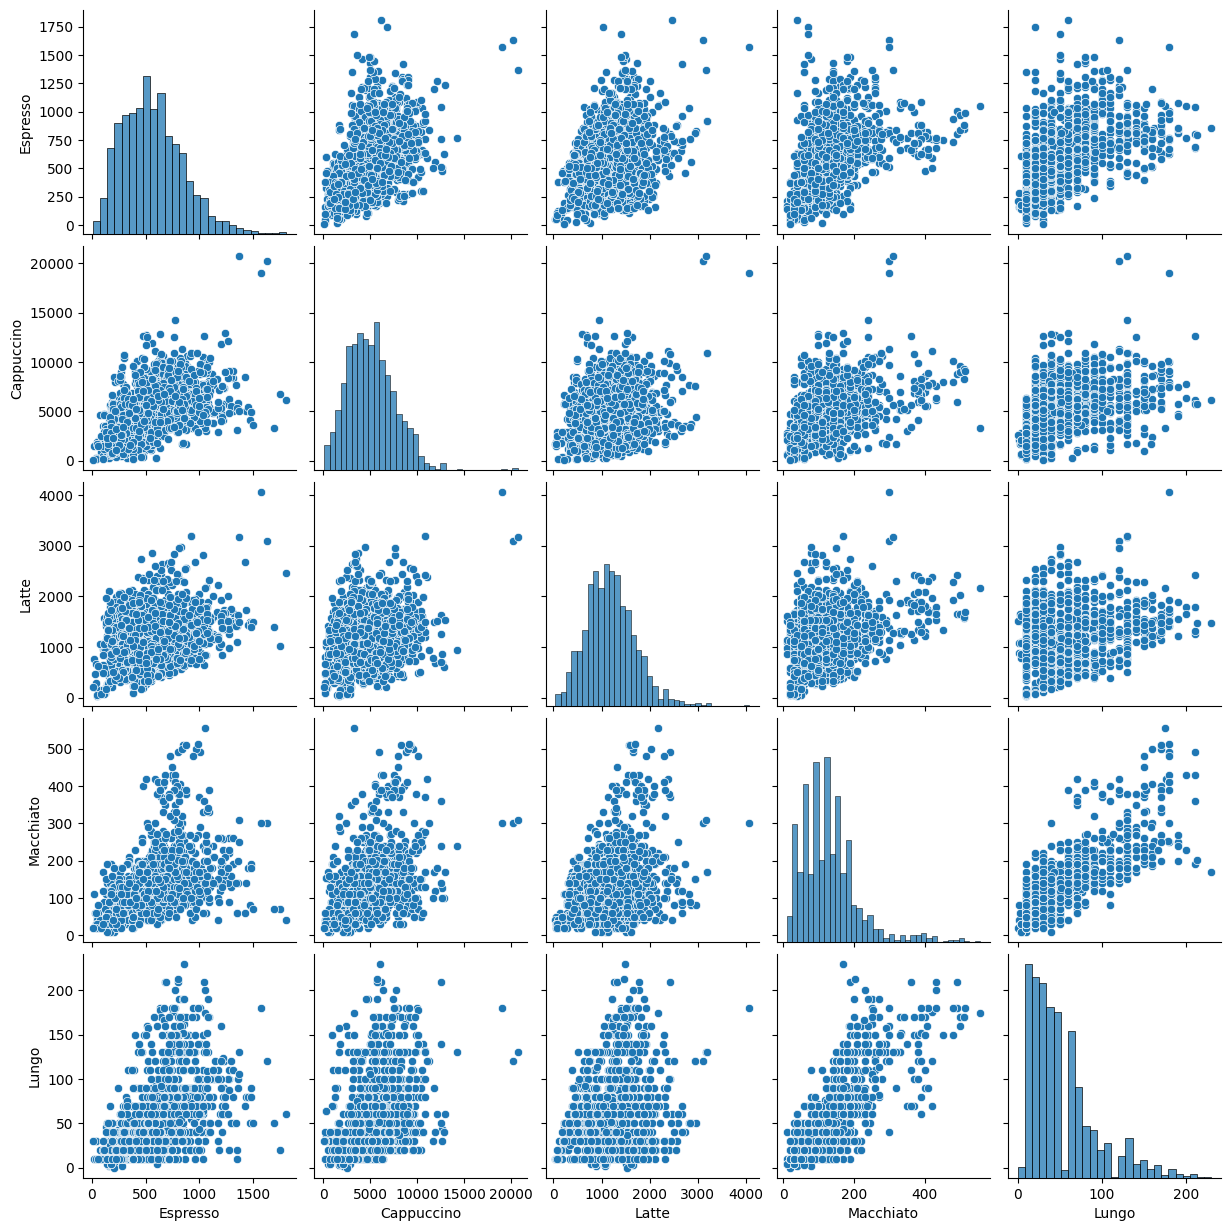

In [55]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['year'],axis=1))
plt.show()

<ipython-input-56-4842c8d10218>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['year'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


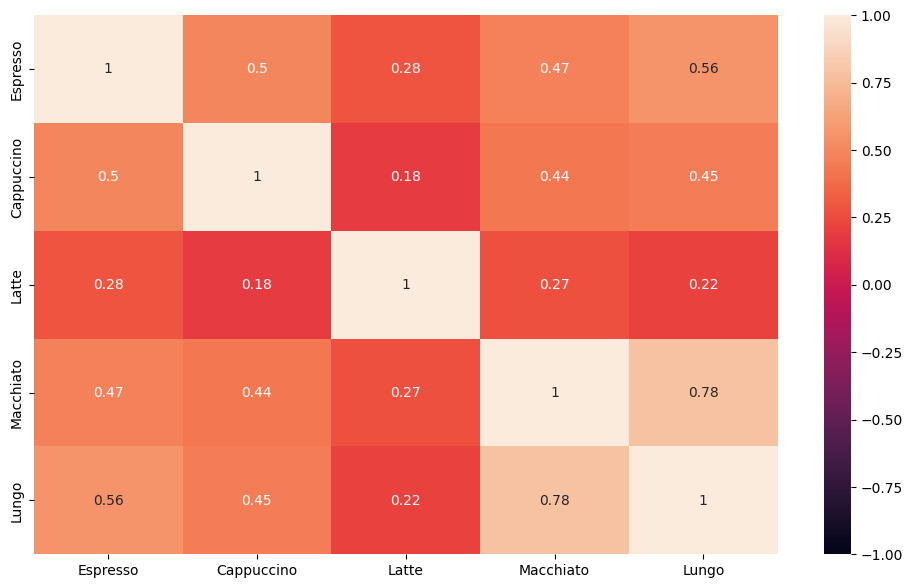

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['year'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

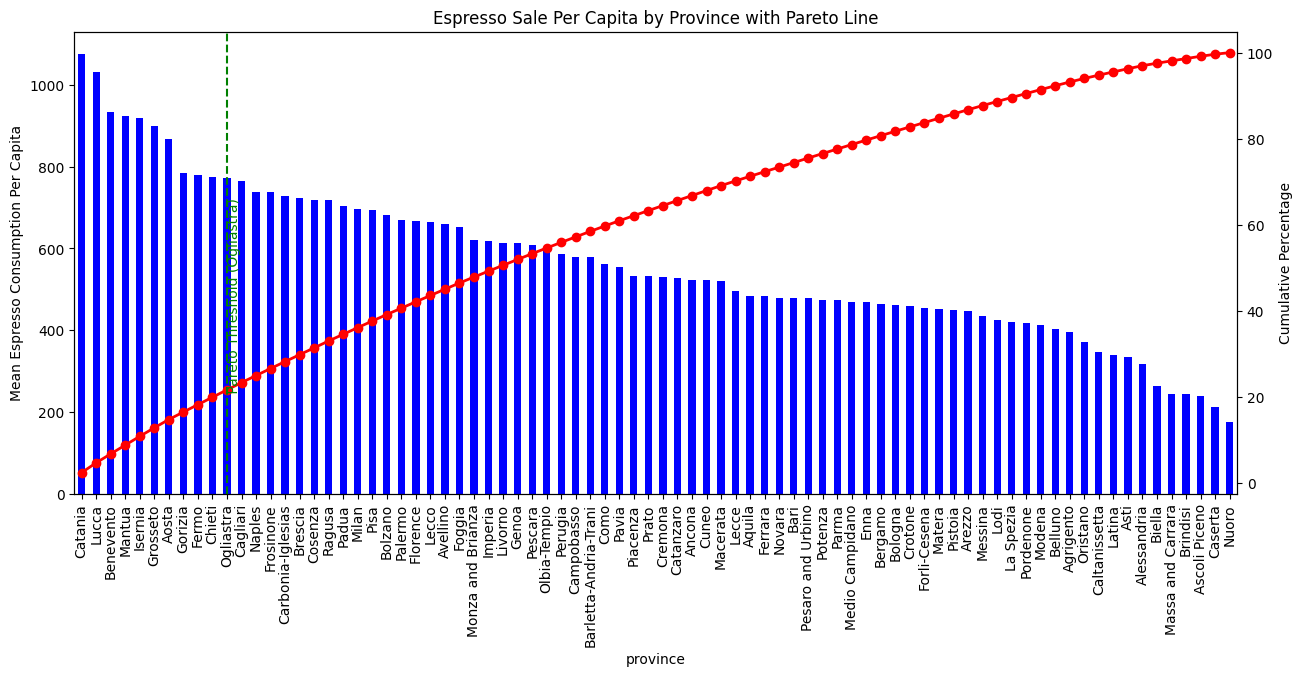

In [58]:

# Group by province and sum the Espresso sales
sales_by_Province_Espresso = data.groupby('province')['Espresso'].mean()

# Sort the sales by province in descending order
sales_by_Province_Espresso = sales_by_Province_Espresso.sort_values(ascending=False)

# Calculate the cumulative percentage of total sales
cumulative_percentage = (sales_by_Province_Espresso.cumsum() / sales_by_Province_Espresso.sum()) * 100

# Plot the bar chart
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the bar chart
sales_by_Province_Espresso.plot(kind='bar', ax=ax1, color='b')
ax1.set_ylabel('Mean Espresso Consumption Per Capita')

# Create a secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(cumulative_percentage.index, cumulative_percentage.values, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage')

# Add a Pareto line annotation
pareto_index = cumulative_percentage[cumulative_percentage >= 20].index[0]
ax2.axvline(x=pareto_index, color='g', linestyle='--')
plt.text(pareto_index, 20, f' Pareto Threshold ({pareto_index})', color='g', rotation=90, verticalalignment='bottom')

plt.title('Espresso Sale Per Capita by Province with Pareto Line')
plt.xlabel('Province')
plt.show()

['Ogliastra', 'Grosseto', 'Fermo', 'Aosta', 'Padua', 'Naples', 'Catania', 'Lucca', 'Mantua', 'Benevento']


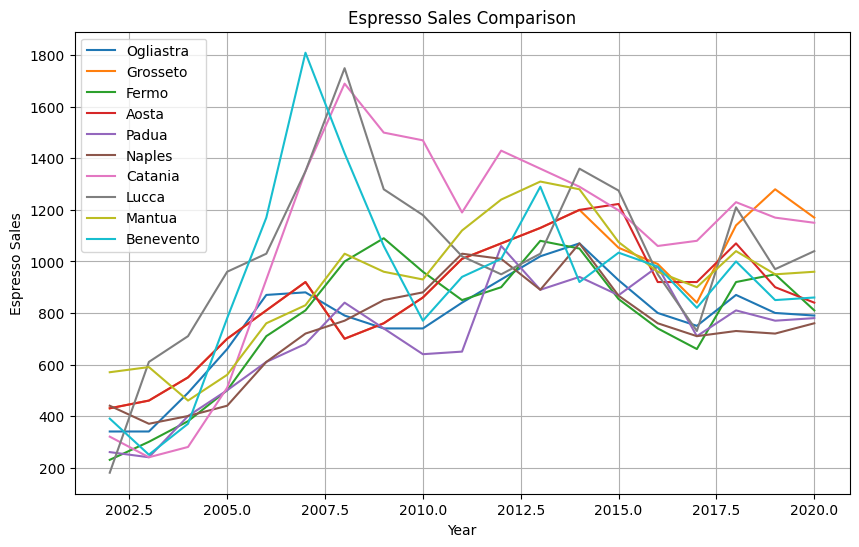

In [64]:


#Compute similarity between provinces based on espresso sales
pivot_table = pd.pivot_table(data, values='Espresso', index='province', columns='year', aggfunc=np.mean, fill_value=0)
#print(pivot_table)

# Normalize the data
normalized_data = (pivot_table - pivot_table.mean()) / pivot_table.std()
#print(normalized_data)

# Calculate cosine similarity between provinces
similarity_matrix = cosine_similarity(normalized_data)

# Identify provinces with similar espresso sales behavior to Milan
milan_index = pivot_table.index.get_loc('Milan')

similar_provinces_indices = np.argsort(similarity_matrix[milan_index])[::-1][1:11]  # Exclude Milan itself

similar_provinces = pivot_table.iloc[similar_provinces_indices].index.tolist()

# Visualize the results
plt.figure(figsize=(10, 6))
for province in similar_provinces:
    plt.plot(pivot_table.columns, pivot_table.loc[province], label=province)

plt.title('Espresso Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Espresso Sales')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def my_exit():

  f=open("Top10.csv","w")
  for i in range(len(similar_provinces)):
          if i<len(similar_provinces)-1:
            f.write(str(similar_provinces[i]+'\n'))
          else:
            f.write(str(similar_provinces[i]))
  exit()